<a href="https://colab.research.google.com/github/ktichola/Image-matching/blob/main/%F0%9F%93%B7Simple_%F0%9F%A5%ABComparison%F0%9F%8D%9A_Algorithm%F0%9F%8D%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'image-matching-challenge-2024:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F71885%2F8143495%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240514%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240514T080948Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D92be78e6b1e38172a16549c3b913d3b294ec77df65a5cc242a6a31bf9793136c6b956cc0336cdc32f7ae129cb5ef1c22760c0cfbea5fe649cf95fca881e70f4d96c2f1885337ca3024079f435dbdfa7252cc99d78306ab1233c798ad061c07ad0248408419c16b8420f235a385386e3a58f103436a2c0a9982d85a8343d7bfc3365b41c55a3d88c23f04ee9e48c81c8b247973b24183b02cd2ed6e6a2972eb030236cca0df22f3e675c3a7cb714251ddde5e2b5129922519f1ce72728dbb3932655fb463e0edc69078b245915aa87f362aabf87ba3441b774dc6f0d2dff48528ee06eedd24c7e310fc3b44760373945d4c6ce500c35bd8ebc6bbe41f854e674e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


<div style="padding:20px;color:black;margin:0;font-size:350%;text-align:center;display:fill;border-radius:5px;background-color:safron;overflow:hidden;font-weight:700;border: 5px solid #21a3a3;"> 📷Image Matching Challenge⛓</div>


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 About The Competition :</font></h3>
    
**Competition Objective:** We have to Construct precise 3D maps using sets of images in diverse scenarios and environments, where we aim to generate accurate spatial representations through **Structure from Motion (SfM) techniques**.
    
**Problem Categories:** Here we look in for six distinct categories, each presenting unique challenges: **Phototourism and historical preservation** **Night vs day** and **temporal changes Aerial and mixed** aerial-ground Repeated structures Natural environments
**Transparencies and reflections**
    
**Evaluation Metric:**  The evaluation is  based on the mean Average Accuracy (mAA) of registered camera centers. This involves computing the best similarity transformation that registers camera centers onto the **ground truth**, considering factors like **scale, rotation**, and **translation**. **RANSAC-like approach** is used for verification.
    
Submission Format: Submissions should predict the pose for each image ID in the test set. The format includes:
**Image path Dataset Scene Rotation matrix (3x3 matrix flattened into a vector) Translation vector (3-D vector)**
    
Images without predicted poses should contain at least one "nan" value in the corresponding rotation_matrix or translation_vector columns.
    
**Organization:** The competition is organized by a  researchers from various institute like Czech Technical University in Prague, Google, University of Palermo, University of Trento, Bruno Kessler Foundation, University of British Columbia, Haiper, and USDA-ARS-AFRS.
    
**Header Photos:** Header photos are credited to S**andro Gonzalez and Ljubomir Žarković on Unsplash.**
This competition aims to address the challenges of matching images across different viewpoints, lighting conditions, and environments, contributing to advancements in **computer vision techniques for 3D reconstruction**.


<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/532173/pexels-photo-532173.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> Import neccessary libraries </span></b> </div>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2


<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/532173/pexels-photo-532173.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> Helper Function To see Images  </span></b> </div>

In [ ]:
def visualize_images_in_folder(folder_path, num_images=6, rows=2, cols=3):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    axes = axes.ravel()
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith(".png")]
    num_images = min(num_images, len(image_files))
    for i in range(num_images):
        img_file = image_files[i]
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Failed to load image: {img_file}")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].set_title(img_file)
        axes[i].axis('off')
    for ax in axes[num_images:]:
        ax.axis('off')
    plt.tight_layout()
    plt.show()

![Illustration-of-the-SIFT-algorithm-1-Differently-scaled-copies-of-the-input-image-are.png](attachment:f9aae0ec-c48c-4a4d-87c9-a21a960073f3.png)

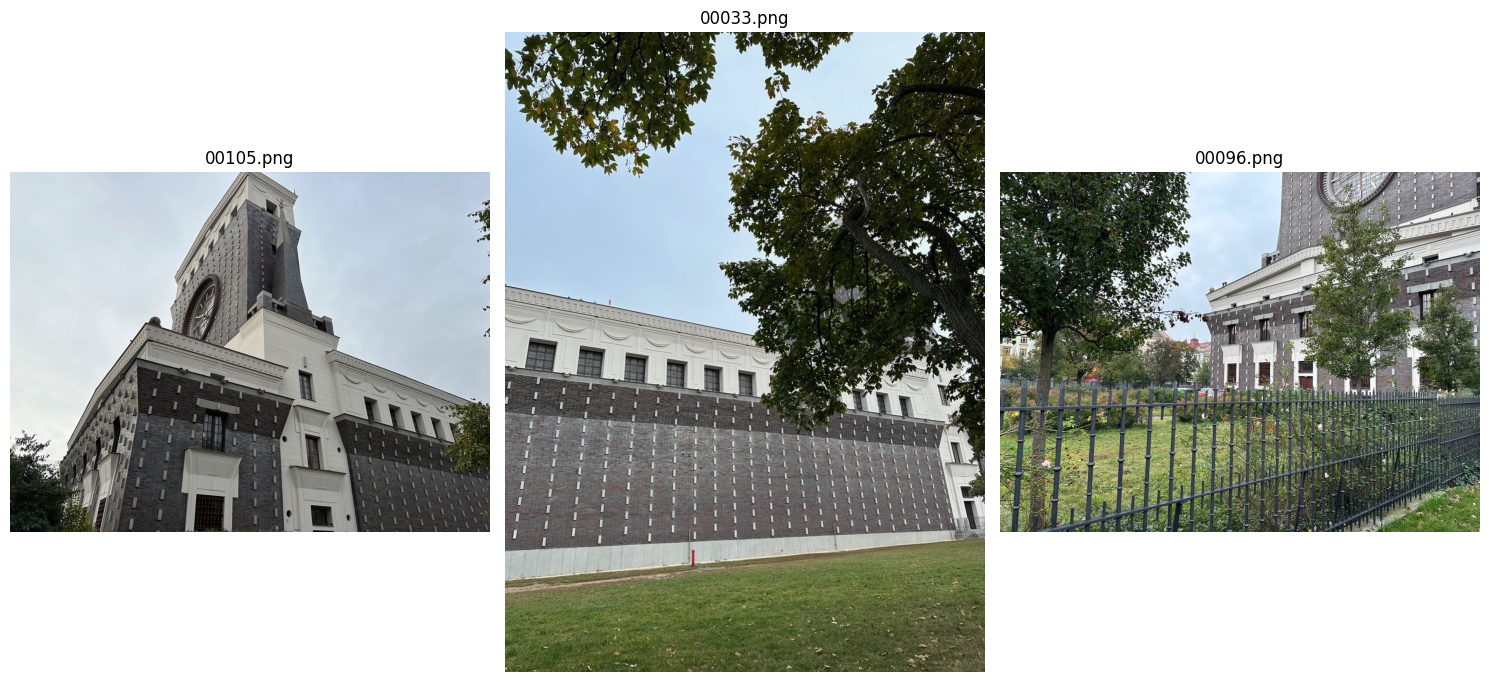

In [ ]:
folder_path = "/kaggle/input/image-matching-challenge-2024/train/church/images/"
visualize_images_in_folder(folder_path, num_images=3, rows=1, cols=3)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:120%; text-align:left">

<h3 align="center"><font color='black'>💡 SIFT Algorithm: How to Use SIFT :</font></h3>
    
**Introduction:**

Humans excel at identifying objects, people, and images through memory and pattern recognition.
The Scale Invariant Feature Transform (SIFT) algorithm mimics this human ability in machines.
SIFT enables machines to recognize objects in images despite variations in angle or scale, a task challenging for traditional computer vision methods.
    
**Learning Objectives:**

Understand the basics of the SIFT algorithm.
Learn how SIFT performs feature matching, identifying key features in images and matching them across different images.
Gain hands-on experience with coding the SIFT algorithm in Python.
    
**Summary::**

SIFT (Scale Invariant Feature Transform) is a powerful technique in computer vision.
It enables machines to recognize objects in images despite changes in scale or angle.
Through feature matching, SIFT identifies key features in images and matches them across different images.
This tutorial provides a beginner-friendly introduction to SIFT and includes hands-on coding exercises in Python.
    


In [ ]:
image1 = cv2.imread('/kaggle/input/image-matching-challenge-2024/train/church/images/00001.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/kaggle/input/image-matching-challenge-2024/test/church/images/00006.png', cv2.IMREAD_GRAYSCALE)

In [ ]:
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

In [ ]:
 sift = cv2.SIFT_create()

In [ ]:
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

In [ ]:
matcher = cv2.BFMatcher()
matches = matcher.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)
matched_image = cv2.drawMatches(image1_rgb, keypoints1, image2_rgb, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

In [ ]:
matched_keypoints1 = np.float32([keypoints1[m.queryIdx].pt for m in matches[:50]])
matched_keypoints2 = np.float32([keypoints2[m.trainIdx].pt for m in matches[:50]])

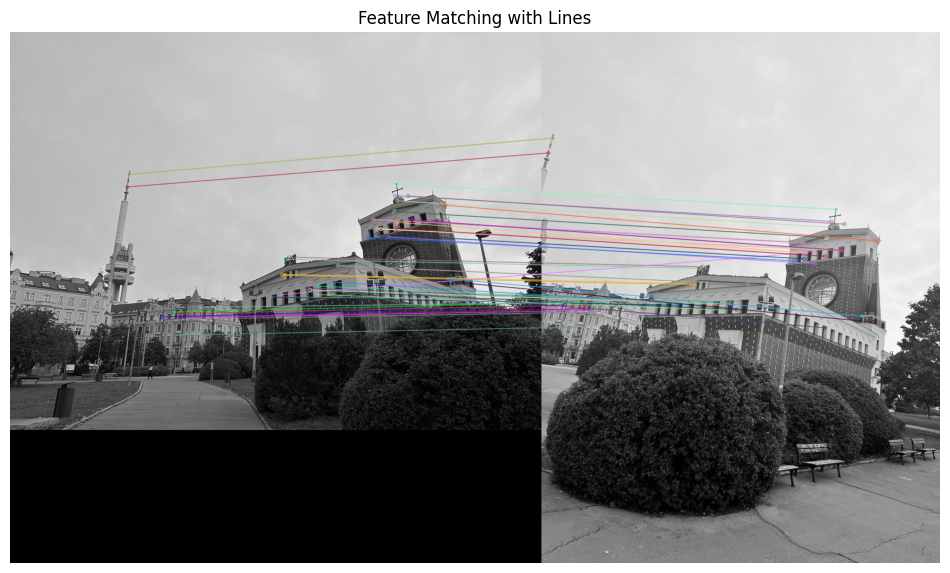

In [ ]:
for pt1, pt2 in zip(matched_keypoints1, matched_keypoints2):
    x1, y1 = pt1
    x2, y2 = pt2
    #plt.plot([x1, x2 + image1.shape[1]], [y1, y2], 'r-', linewidth=1)
plt.figure(figsize=(12, 8))
plt.imshow(matched_image)
plt.title('Feature Matching with Lines')
plt.axis('off')
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white
            ; font-size:120%; text-align:left">

<h3 align="center"><font color='black'>💡 AKAZE Algorithm: How to Use AKAZE :</font></h3>
    
**AKAZE (Accelerated-KAZE)** is a feature detection and description algorithm introduced as an **improvement over KAZE (KAZE (Kart-hikey Affine and Zernike Descriptors)**, which itself is an extension of the popular SIFT (Scale-Invariant Feature Transform) and SURF (Speeded-Up Robust Features) algorithms. A**KAZE is designed to be both fast and robust **to various transformations such as rotation, scale changes, and illumination changes.

**Here are some key points about AKAZE**:

**Speed and Efficiency**: AKAZE is designed to be computationally efficient while maintaining robustness. It achieves this by using a nonlinear scale space and various optimizations.
    
**Scale-Invariance**: Like SIFT and SURF, AKAZE is scale-invariant, meaning it can detect features at different scales in an image. This is crucial for matching objects that may appear at different sizes in different images.
    
**Rotation-Invariance**: AKAZE also exhibits rotation invariance, meaning it can detect and match features even when the images are rotated relative to each other.
    
**Affine Transformation Handling**: Unlike SIFT and SURF, which are not inherently affine-invariant, AKAZE is able to handle affine transformations such as shearing and stretching.
    
**Descriptor Generation**: AKAZE generates descriptors that capture both local and global information about the keypoints, making them robust to changes in viewpoint, lighting, and occlusion.
    
**Nonlinear Scale Space**: AKAZE uses a nonlinear scale space representation, which allows it to adaptively adjust the scale at each keypoint location, leading to improved performance compared to linear scale space methods.
    

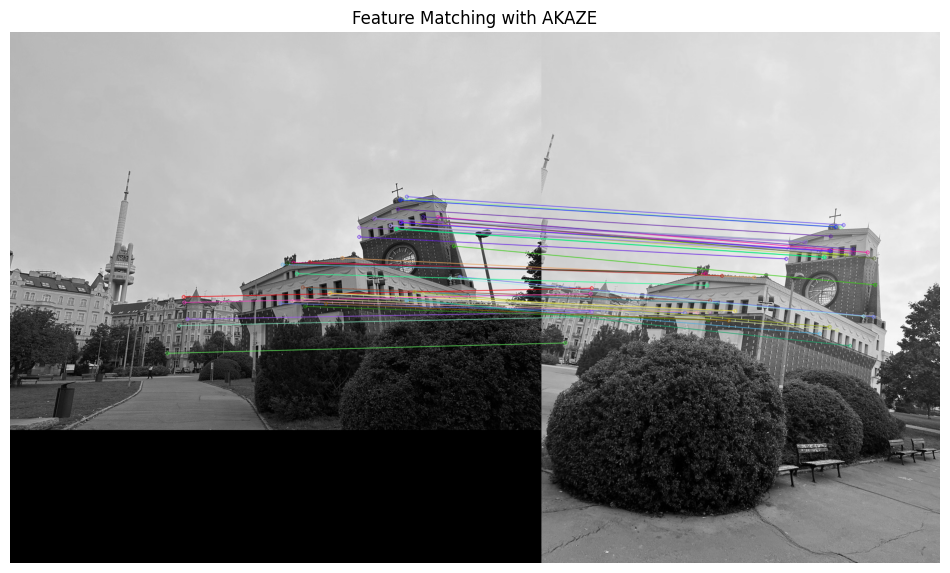

In [ ]:
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
akaze = cv2.AKAZE_create()
keypoints1, descriptors1 = akaze.detectAndCompute(image1, None)
keypoints2, descriptors2 = akaze.detectAndCompute(image2, None)
matcher = cv2.BFMatcher()
matches = matcher.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)
matched_image = cv2.drawMatches(image1_rgb, keypoints1, image2_rgb, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
matched_keypoints1 = np.float32([keypoints1[m.queryIdx].pt for m in matches[:50]])
matched_keypoints2 = np.float32([keypoints2[m.trainIdx].pt for m in matches[:50]])

for pt1, pt2 in zip(matched_keypoints1, matched_keypoints2):
    x1, y1 = pt1
    x2, y2 = pt2
    #plt.plot([x1, x2 + image1.shape[1]], [y1, y2], 'r-', linewidth=1)
plt.figure(figsize=(12, 8))
plt.imshow(matched_image)
plt.title('Feature Matching with AKAZE')
plt.axis('off')
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white
            ; font-size:120%; text-align:left">

<h3 align="center"><font color='black'>💡 Oriented FAST and Rotated BRIEF (ORB) Algorithm: How to Use ORB :</font></h3>
    
**Oriented FAST and Rotated BRIEF (ORB)** is a feature detection and description algorithm **developed by Ethan Rublee, Vincent Rabaud, Kurt Konolige, and Gary Bradski at Willow Garage**. It is designed to be a fast alternative to existing feature detection methods like SIFT (Scale-Invariant Feature Transform) and SURF (Speeded-Up Robust Features), while also being robust to various transformations such as rotation and scale changes.

**Here are some key points about ORB:**

**FAST Key Point Detection:** ORB uses a modified version of the FAST (Features from Accelerated Segment Test) algorithm for key point detection. FAST is a corner detection algorithm known for its computational efficiency.
    
**Rotated BRIEF Descriptor:** Instead of using the complex gradient-based descriptors used in SIFT and SURF, ORB uses the BRIEF (Binary Robust Independent Elementary Features) descriptor. BRIEF generates binary descriptors by comparing pairs of pixel intensities at predetermined locations.
    
**Efficient Descriptor Matching:** ORB employs efficient techniques for descriptor matching, such as the Hamming distance, which allows for fast comparison of binary descriptors.
    
**Scale-Invariance:** ORB is inherently scale-invariant, allowing it to detect features at different scales in an image.
Rotation-Invariance: While ORB is not fully rotation-invariant, it can handle rotations to some extent by using oriented FAST key points and rotated BRIEF descriptors.
    
**Affine Invariance:** ORB does not inherently handle affine transformations like shearing and stretching. However, it is possible to achieve some level of affine invariance by using additional techniques such as image pyramids.
    
**OpenCV Implementation:** ORB is implemented in the OpenCV library.we can create an ORB detector using the cv2.ORB_create() function and then use it to detect key points and compute descriptors in images.

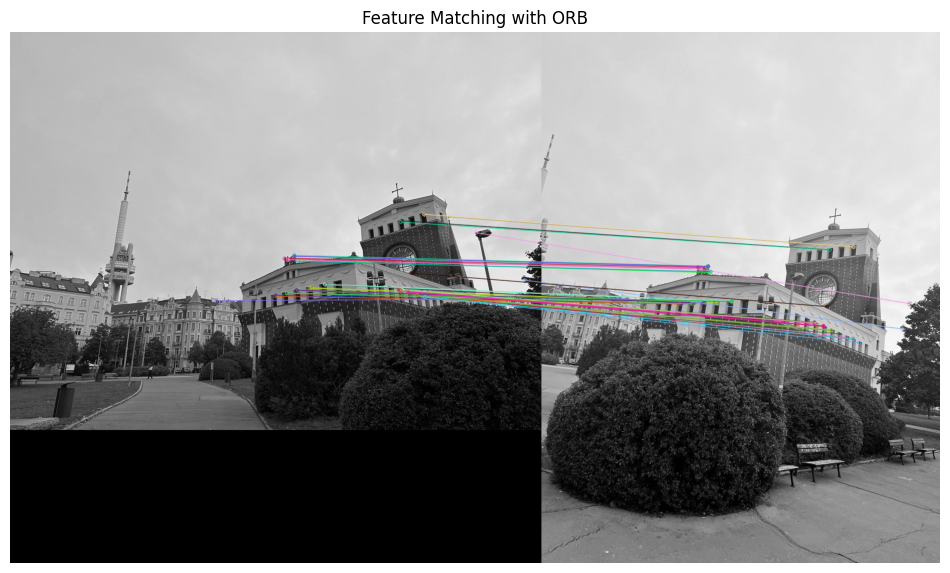

In [ ]:
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = matcher.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)
matched_image = cv2.drawMatches(image1_rgb, keypoints1, image2_rgb, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
matched_keypoints1 = np.float32([keypoints1[m.queryIdx].pt for m in matches[:50]])
matched_keypoints2 = np.float32([keypoints2[m.trainIdx].pt for m in matches[:50]])
for pt1, pt2 in zip(matched_keypoints1, matched_keypoints2):
    x1, y1 = pt1
    x2, y2 = pt2
    #plt.plot([x1, x2 + image1.shape[1]], [y1, y2], 'r-', linewidth=1)
plt.figure(figsize=(12, 8))
plt.imshow(matched_image)
plt.title('Feature Matching with ORB')
plt.axis('off')
plt.show()

# Thank You! 🙏

<div style="box-shadow: rgba(0, 0, 0, 0.4) -5px 5px inset, rgba(0, 0, 0, 0.3) -10px 10px inset, rgba(0, 0, 0, 0.2) -15px 15px inset, rgba(0, 0, 0, 0.1) -20px 20px inset, rgba(0, 0, 0, 0.05) -25px 25px inset; padding:20px; font-size:30px; font-family: consolas; display:fill; border-radius:15px; color: rgba(0, 0, 0, 0.7)">
    <b>༼⁠ ⁠つ⁠ ⁠◕⁠‿⁠◕⁠ ⁠༽⁠つ Thank You!</b>
</div>

<p style="font-family:verdana; color:black; font-family: consolas; font-size: 16px;">
    💌 Thanks for your time and attention! If you have any feedback or suggestions, please share them. <br><br>
    🚀 If you enjoyed this notebook, consider giving it an upvote to help others find it too. Your support means a lot! <br><br>
    ❤️ Once again, thank you for your support, and I look forward to seeing you again soon!
</p>


## <div style="box-shadow: rgba(0, 0, 0, 0.18) 0px 2px 4px inset; padding:20px; font-size:24px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(67, 66, 66)"> <b> Refrences</b></div>

<div style="background-color: black; padding: 20px; border-radius: 10px; margin: 20px auto; max-width: 600px;">
    <center>
        <div style="background-color: white; padding: 20px; border-radius: 10px;">
            <b style="font-size: 24px; color: #ff6600;">👏😊 &nbsp; IF YOU FIND THIS HELPFUL, PLEASE UPVOTE! &nbsp; 💢👏</b>
            <div style="margin-top: 20px; font-size: 18px; color: black;">
                🥽🖥This took quite a bit of effort on my part, and while it might seem trivial, 🏆🏆receiving your appreciation means a lot to me! 😅🎃 Your upvotes inspire me to keep creating helpful content like this🖥🍱.
            </div>
        </div>
    </center>
</div>